# Words embedding

In this notebook, I will show how to embed words in higher-dimensional space, and visualize them to see similarities.

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/juan.rodriguez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juan.rodriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Word2Vec is a technique for learning word embeddings that was developed by Tomas Mikolov and colleagues at Google. It is based on the principle that words that appear in similar contexts tend to have similar meanings. For example, the words "king" and "queen" may often appear in similar contexts, and Word2Vec will represent them as vectors that are close to each other in the vector space.

In [4]:
# 1. Load or train a gensim Word2Vec model
# This example uses a small, in-memory corpus for demonstration.

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens


sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world we live in.",
    "Deep learning techniques have greatly improved image recognition.",
    "Natural language processing allows computers to understand human language.",
    "Data science combines statistics, computer science, and domain knowledge.",
    "The weather is nice today, perfect for a walk in the park.",
    "Cats are often seen as independent and curious creatures.",
    "The stock market fluctuates based on various economic indicators.",
    "Exploring new cuisines can be an exciting culinary adventure.",
    "Machine learning algorithms can learn from data and make predictions.",
]

# Preprocess sentences
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]


# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [5]:
# 2. Extract words and their vectors
word_vectors = model.wv
words = list(word_vectors.index_to_key)
vectors = word_vectors.vectors

In [10]:
len(words), vectors.shape

(62, (62, 100))

In [8]:
# Load the model (if needed)
# model = Word2Vec.load("word2vec.model")

# Similarity between two words
try:
    similarity_cat_dog = model.wv.similarity('cat', 'dog')
    print(f"Similarity between 'cat' and 'dog': {similarity_cat_dog:.4f}")
except KeyError as e:
    print(f"KeyError: {e}")

# Most similar words to 'cat'
try:
    similar_words_cat = model.wv.most_similar('cat', topn=5)
    print("Most similar words to 'cat':", similar_words_cat)
except KeyError as e:
    print(f"KeyError: {e}")

# Perform an analogy task
try:
    analogy_result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
    print("Analogy result for 'king - man + woman':", analogy_result)
except KeyError as e:
    print(f"KeyError: {e}")

KeyError: "Key 'cat' not present"
KeyError: "Key 'cat' not present in vocabulary"
KeyError: "Key 'king' not present in vocabulary"


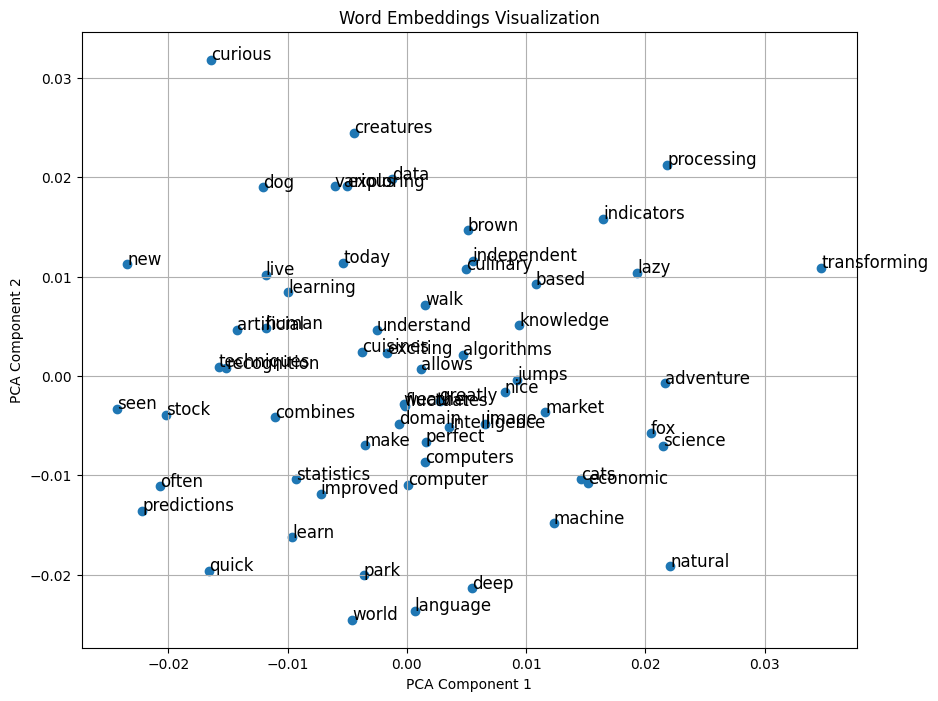

In [14]:
# Reduce dimensionality of word vectors for visualization
word_vectors = model.wv[model.wv.index_to_key]  # Get the word vectors
pca = PCA(n_components=2)  # Initialize PCA
result = pca.fit_transform(word_vectors)  # Fit and transform the word vectors

# Plot the words in a 2D space
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Annotate words in the plot
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()
